In [1]:
import pandas as pd

In [2]:
df_items_ratings = pd.read_csv('../data/sample_dataset_1.csv', header=None, names=['item', 'user', 'rating'])
df_items_ratings

,item,user,rating
0,bulb,20,6.5
1,tube,20,5.0
2,fan,20,6.0
3,tube,21,6.0
4,bulb,21,7.0
5,bulb,23,7.5
6,fan,23,6.0


## Task 1: Plot the average rating for each item

### Find unique items and their frequencies

In [3]:
df_items_ratings.item.nunique()

3

In [4]:
df_items_ratings.item.value_counts()

bulb    3
tube    2
fan     2
Name: item, dtype: int64

### Use groupby() to create groups of items

In [5]:
df_items_ratings_gb_item = df_items_ratings.groupby('item')

### Calculate the average rating for each unique item (group) by iterating through each group

In [6]:
average_ratings = []
for group_name, group_data in df_items_ratings_gb_item.groups.items():
    average_ratings.append((group_name, df_items_ratings_gb_item.get_group(group_name).rating.mean()))
average_ratings

[('bulb', 7.0), ('fan', 6.0), ('tube', 5.5)]

In [7]:
df_average_ratings = pd.DataFrame(average_ratings, columns=['item', 'avg_rating'])
df_average_ratings

,item,avg_rating
0,bulb,7.0
1,fan,6.0
2,tube,5.5


### First, let's try a line plot, which is the default graph type in pandas.plot()

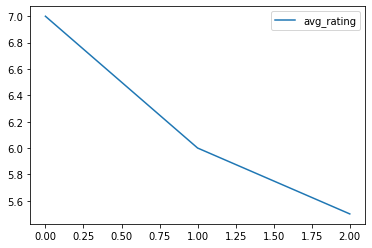

In [8]:
df_average_ratings.plot()

#### Many things are left desired in the plot above, such as proper label. But the most important thing to note is that the type of plot is not suitable for the case at hand.

#### Line charts are great to show change over time.

### Try a pie chart, maybe?

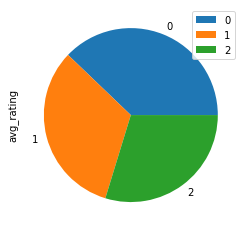

In [9]:
df_average_ratings.plot(kind='pie', y='avg_rating')

#### As we can see, pie chart is also not suitable for this case.

#### Pie charts are great to show proportions.

### Plot a barchart, which is the most appropriate type for this particular case.

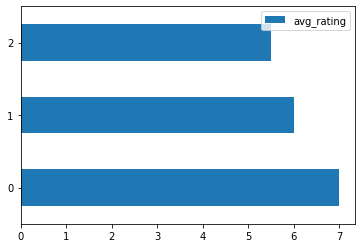

In [10]:
df_average_ratings.plot(kind='barh')

### Set the item name as index, so that the barchart would get the labels automatically

In [11]:
df_average_ratings.set_index('item', inplace=True)
df_average_ratings

,avg_rating
item,
bulb,7.0
fan,6.0
tube,5.5


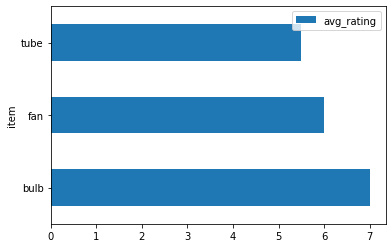

In [12]:
df_average_ratings.plot(kind='barh')

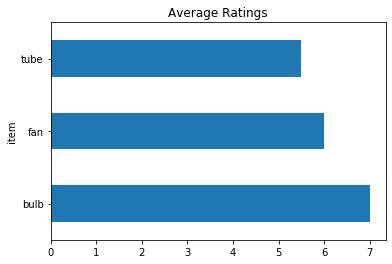

In [13]:
df_average_ratings.plot(kind='barh', legend=False, title='Average Ratings')

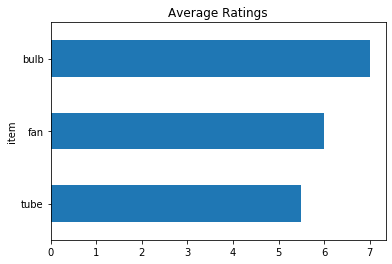

In [14]:
df_average_ratings.sort_values(by='avg_rating').plot(kind='barh', legend=False, title='Average Ratings')

## Task 2: plot the sales amounts for each month

In [15]:
df_shampoo_sales_data = pd.read_csv('../data/shampoo_sales_data.csv')
df_shampoo_sales_data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


### Line chart is the most appropriate for this case, try a default line chart first

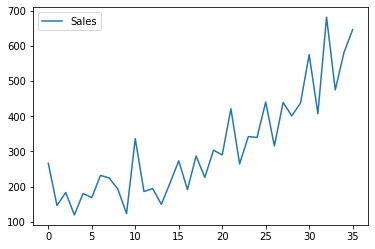

In [16]:
df_shampoo_sales_data.plot()

### Set proper labels

In [17]:
df_shampoo_sales_data.set_index('Month', inplace=True)

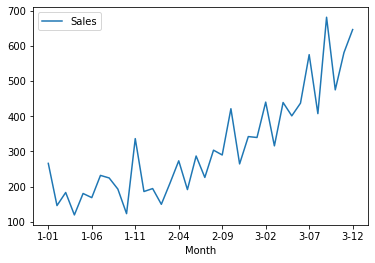

In [18]:
df_shampoo_sales_data.plot()

### Let's see what happens when you use a sub-optimal graph type for this particular case

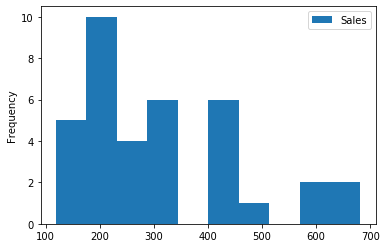

In [19]:
df_shampoo_sales_data.plot(kind='hist')